In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement =Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [10]:
dir(measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'registry',
 'station',
 'tobs']

<function matplotlib.pyplot.show(close=None, block=None)>

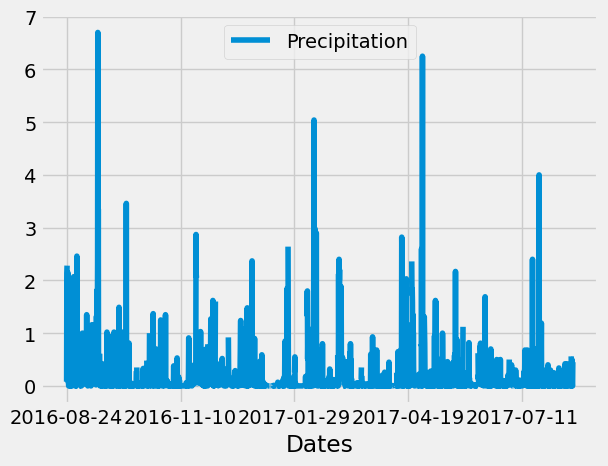

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago=dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
most_recent = session.query(measurement.date).filter(measurement.date >'2016-08-23').order_by(measurement.date).all()
dir(measurement)
precipitation = session.query(measurement.prcp,measurement.date).filter(measurement.date>'2016-08-23').order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation,columns=['Precipitation','Dates'])
df.set_index('Dates')

# Sort the dataframe by date
dates = df.sort_values(by='Dates')

# Use Pandas Plotting with Matplotlib to plot the data
dates.plot(x='Dates')
plt.show

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
dir(station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'registry',
 'station']

In [14]:
# Design a query to calculate the total number of stations in the dataset
total = session.query(func.count(station.station)).all()
total

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station,func.count(measurement.station))\
                        .group_by( measurement.station ).\
                       order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low =session.query(func.min(measurement.tobs).filter(measurement.station == 'USC00519281')).all()
avg =session.query(func.avg(measurement.tobs).filter(measurement.station == 'USC00519281')).all()
high =session.query(func.max(measurement.tobs).filter(measurement.station == 'USC00519281')).all()
print(low,high,avg)          

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


<function matplotlib.pyplot.show(close=None, block=None)>

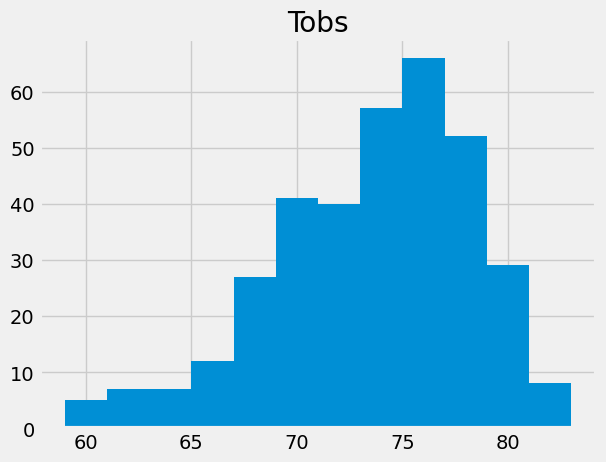

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.tobs).filter(measurement.date>'2016-08-23',measurement.station == 'USC00519281').order_by(measurement.date).all()
df2 = pd.DataFrame(temp,columns=['Tobs'])
df2
df2.hist(bins=12)
plt.show

# Close Session

In [19]:
type(measurement.date)

sqlalchemy.orm.attributes.InstrumentedAttribute

In [ ]:
# Close Session
session.close()

In [ ]:
type(measurement)
